In [1]:
import numpy as np
import matplotlib.pyplot as plt
import enzyme_utils as utils
# import pymc3 as pm
# import theano.tensor as tt
import seaborn as sns
import msdanalyzer as msd

In [2]:
import scipy.stats

In [8]:
dir_ = 'new_data/transformed_buffer/'
x, y, t, track_info, lookup, track_id = utils.loadRawMinData(dir_, min_length=5, isDx=False)

Total 15 files read; Total 813 trajectories (length >= 5) loaded; Total 23909 data points


### Full Analytical Posterior

The 2D likelihood is: 

$$p(dx, dy \mid D) = \prod_{k=1}^M\left(\frac{1}{4\pi D \tau_k}\right)exp\left(-\sum_{k=1}^M\frac{dx^2_k + dy^2_k}{4D \tau_k}\right)$$

D has an inverse gamma prior: 

$$p(D \mid \alpha, \beta) = \frac{\beta^{\alpha}}{\text{Gamma}(\alpha)}D^{-\alpha-1}exp\left(-\frac{\beta}{D}\right) $$

The marginal likelihood is : 

$$p(dx, dy) = \int p(dx, dy, D)dD = \frac{\beta^{\alpha}\text{Gamma}(\alpha_0)}{\beta_0^{\alpha_0}\text{Gamma}(\alpha)}\prod_{k=1}^M\left(\frac{1}{4\pi\tau_k}\right) $$

where, 

$$\alpha_0 = M+\alpha$$
$$\beta_0 = \sum_{k=1}^M\frac{dx^2_k + dy^2_k}{4\tau_k}+\beta $$

The analytical full posterior is then: 

$$p(D \mid dx, dy) = \frac{\beta_0^{\alpha_0}}{\text{Gamma}(\alpha_0)}D^{-\alpha_0 - 1}exp\left(-\frac{\beta_0}{D}\right)$$

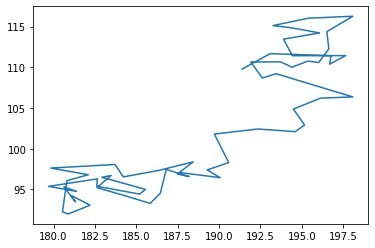

In [13]:
# select a single track
sx, sy, st = utils.loadSelectTraj(x, y, t, track_info, 102, False)
sdx, sdy, sdt = sx[1:] - sx[:-1], sy[1:] - sy[:-1], st[1:] - st[:-1]
plt.plot(sx, sy);

In [14]:
def fullPosterior(dx, dy, dt, alpha, beta, D): 
    
    M = len(dx)
    b_0 = np.sum((dx**2+dy**2)/4/dt) + beta
    a_0 = M + alpha
    
    logp = a_0*np.log(b_0) - np.log(scipy.special.gamma(a_0)) + (-a_0-1) *np.log(D) - b_0/D
    
    return logp

In [15]:
def MAP(dx, dy, dt, a, b): 
    alpha = len(dx) + a
    beta = np.sum((dx**2 + dy**2) / 4 / dt) + b
    return beta / (alpha - 1)

In [16]:
map_102 = MAP(sdx, sdy, sdt, a=1.1, b=0.)

In [17]:
D_range = np.linspace(0.1, 3, 200)

logP = fullPosterior(sdx, sdy, sdt, 1.1, 0.8, D_range)
logP = logP - logP.max()

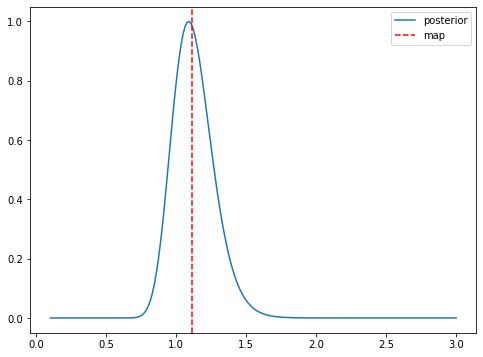

In [19]:
plt.figure(figsize=(8, 6))
plt.plot(D_range, np.exp(logP), label='posterior')
plt.axvline(x=map_102, c='r', ls='--', label='map')
plt.legend();